# Data Preprocessing
# Project : Data-Driven Optimization of Sperm Selection Efficiency

# Import Required Libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [160]:
data = pd.read_excel(r"C:\Users\santh\Downloads\Data Set (1)\Sperm_Selection_Dataset_DA.xlsx")

In [161]:
data.head(5)

,Record_ID,Selection_Date,Patient_ID,Cycle_Number,Oocyte_ID,Embryologist_ID,Embryologist_Experience_Years,Sperm_Concentration_M_per_ml,Total_Motility_Percent,Progressive_Motility_Percent,...,Motility_Pattern,Vacuoles_Present,Fertilization_Success,Day3_Grade,Day5_Blastocyst_Grade,Usable_Embryo,Microscope_Type,Magnification_Used,Lab_Temperature_C,Lab_Humidity_Percent
0,ICSI-00001,2024-08-11,PT-4741,5,OO-00001,EMB_F,4,18.75,69.3,55.5,...,Sluggish,Not_Assessed,0,NaN,NaN,0,Inverted_A,400x,36.9,49
1,ICSI-00002,2025-07-10,PT-4998,3,OO-00002,EMB_D,6,26.65,73.6,47.5,...,Progressive,Small,0,NaN,NaN,0,Inverted_C,200x,37.0,55
2,ICSI-00003,2025-01-26,PT-3403,4,OO-00003,EMB_B,12,4.58,43.1,36.2,...,Progressive,Large,1,1.2,NaN,0,Inverted_A,400x,36.9,52
3,ICSI-00004,2024-08-15,PT-9780,1,OO-00004,EMB_F,4,47.26,67.7,47.2,...,Progressive,Large,1,1.1,NaN,0,Inverted_B,400x,36.6,50
4,ICSI-00005,2024-07-11,PT-1294,3,OO-00005,EMB_H,10,3.03,61.0,41.8,...,Non-Progressive,Small,1,1.2,NaN,0,Inverted_B,400x,37.3,50


# Data Inspection:

In [163]:
print("(rows, columns) = ", data.shape)

(rows, columns) =  (1215, 26)


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Record_ID                      1215 non-null   object 
 1   Selection_Date                 1215 non-null   object 
 2   Patient_ID                     1215 non-null   object 
 3   Cycle_Number                   1215 non-null   int64  
 4   Oocyte_ID                      1215 non-null   object 
 5   Embryologist_ID                1215 non-null   object 
 6   Embryologist_Experience_Years  1215 non-null   int64  
 7   Sperm_Concentration_M_per_ml   1215 non-null   float64
 8   Total_Motility_Percent         1215 non-null   float64
 9   Progressive_Motility_Percent   1215 non-null   float64
 10  Normal_Morphology_Percent      1215 non-null   float64
 11  Selection_Time_Seconds         1215 non-null   int64  
 12  Head_Shape_Score               1215 non-null   o

In [165]:
data.isna().sum()

Record_ID                          0
Selection_Date                     0
Patient_ID                         0
Cycle_Number                       0
Oocyte_ID                          0
Embryologist_ID                    0
Embryologist_Experience_Years      0
Sperm_Concentration_M_per_ml       0
Total_Motility_Percent             0
Progressive_Motility_Percent       0
Normal_Morphology_Percent          0
Selection_Time_Seconds             0
Head_Shape_Score                   0
Acrosome_Status                    0
Midpiece_Assessment               31
Tail_Assessment                   61
Motility_Pattern                   0
Vacuoles_Present                 298
Fertilization_Success              0
Day3_Grade                       477
Day5_Blastocyst_Grade            830
Usable_Embryo                      0
Microscope_Type                    0
Magnification_Used                29
Lab_Temperature_C                  0
Lab_Humidity_Percent               0
dtype: int64

In [166]:
for col in data.columns:
    print(col, ":", data[col].unique())

Record_ID : ['ICSI-00001' 'ICSI-00002' 'ICSI-00003' ... 'ICSI-01213' 'ICSI-01214'
 'ICSI-01215']
Selection_Date : ['2024-08-11' '2025-07-10' '2025-01-26' '2024-08-15' '2024-07-11'
 '2024-05-21' '2024-08-30' '2025-08-10' '2024-12-01' '2025-03-27'
 '2025-08-02' '2024-07-27' '2025-05-08' '2024-08-08' '2024-09-08'
 '2025-03-05' '2025-04-09' '2025-09-04' '2025-06-18' '2025-05-21'
 '2024-11-08' '2025-02-01' '2024-10-08' '2025-11-27' '2025-03-10'
 '2024-05-22' '2025-01-08' '2025-08-18' '2024-06-28' '2025-09-23'
 '2025-08-19' '2024-11-06' '2024-12-30' '2025-09-17' '2025-08-28'
 '2024-10-14' '2025-01-29' '2025-05-23' '2025-03-12' '2024-05-14'
 '2024-12-28' '2025-04-11' '2025-04-05' '2024-07-31' '2025-05-02'
 '2025-07-29' '2025-07-02' '2025-09-21' '2024-06-04' '2024-11-22'
 '2024-07-20' '2024-05-02' '2025-05-25' '2024-08-14' '2025-08-20'
 '2025-06-06' '2024-10-09' '2024-11-18' '2025-01-25' '2025-07-30'
 '2025-08-05' '2025-01-07' '2025-02-20' '2025-04-03' '2024-06-22'
 '2024-12-03' '2024-11-04' '

In [167]:
data.dtypes

Record_ID                         object
Selection_Date                    object
Patient_ID                        object
Cycle_Number                       int64
Oocyte_ID                         object
Embryologist_ID                   object
Embryologist_Experience_Years      int64
Sperm_Concentration_M_per_ml     float64
Total_Motility_Percent           float64
Progressive_Motility_Percent     float64
Normal_Morphology_Percent        float64
Selection_Time_Seconds             int64
Head_Shape_Score                  object
Acrosome_Status                   object
Midpiece_Assessment               object
Tail_Assessment                   object
Motility_Pattern                  object
Vacuoles_Present                  object
Fertilization_Success              int64
Day3_Grade                       float64
Day5_Blastocyst_Grade             object
Usable_Embryo                      int64
Microscope_Type                   object
Magnification_Used                object
Lab_Temperature_

In [168]:
data.describe()

,Cycle_Number,Embryologist_Experience_Years,Sperm_Concentration_M_per_ml,Total_Motility_Percent,Progressive_Motility_Percent,Normal_Morphology_Percent,Selection_Time_Seconds,Fertilization_Success,Day3_Grade,Usable_Embryo,Lab_Temperature_C,Lab_Humidity_Percent
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,738.000000,1215.000000,1215.000000,1215.000000
mean,2.097119,7.558848,16.563399,55.235062,40.060329,8.549712,152.577778,0.597531,2.058943,0.238683,37.015720,50.023868
std,1.183543,3.656992,15.963450,17.714136,13.566343,6.099050,43.448566,0.490597,0.831475,0.426454,0.304537,5.062892
min,1.000000,3.000000,1.060000,5.000000,3.200000,0.000000,20.000000,0.000000,1.100000,0.000000,36.000000,34.000000
25%,1.000000,4.000000,7.225000,42.750000,30.700000,5.000000,126.000000,0.000000,1.200000,0.000000,36.800000,46.000000
50%,2.000000,7.000000,12.160000,55.700000,39.700000,7.900000,152.000000,1.000000,2.100000,0.000000,37.000000,50.000000
75%,3.000000,10.000000,19.945000,68.000000,49.000000,11.300000,180.500000,1.000000,2.200000,0.000000,37.200000,53.000000
max,5.000000,15.000000,227.280000,95.000000,80.500000,48.700000,289.000000,1.000000,4.200000,1.000000,38.100000,70.000000


# Type Casting:

In [170]:
data['Selection_Date'] = pd.to_datetime(data['Selection_Date'], errors = 'coerce')

In [171]:
data.dtypes

Record_ID                                object
Selection_Date                   datetime64[ns]
Patient_ID                               object
Cycle_Number                              int64
Oocyte_ID                                object
Embryologist_ID                          object
Embryologist_Experience_Years             int64
Sperm_Concentration_M_per_ml            float64
Total_Motility_Percent                  float64
Progressive_Motility_Percent            float64
Normal_Morphology_Percent               float64
Selection_Time_Seconds                    int64
Head_Shape_Score                         object
Acrosome_Status                          object
Midpiece_Assessment                      object
Tail_Assessment                          object
Motility_Pattern                         object
Vacuoles_Present                         object
Fertilization_Success                     int64
Day3_Grade                              float64
Day5_Blastocyst_Grade                   

# Check the duplicate records

In [174]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1210    False
1211    False
1212    False
1213    False
1214    False
Length: 1215, dtype: bool

In [175]:
data.duplicated().sum()

0

In [176]:
data = data.drop_duplicates()

# Missing values analysis

In [178]:
data.isna().sum()

Record_ID                          0
Selection_Date                     0
Patient_ID                         0
Cycle_Number                       0
Oocyte_ID                          0
Embryologist_ID                    0
Embryologist_Experience_Years      0
Sperm_Concentration_M_per_ml       0
Total_Motility_Percent             0
Progressive_Motility_Percent       0
Normal_Morphology_Percent          0
Selection_Time_Seconds             0
Head_Shape_Score                   0
Acrosome_Status                    0
Midpiece_Assessment               31
Tail_Assessment                   61
Motility_Pattern                   0
Vacuoles_Present                 298
Fertilization_Success              0
Day3_Grade                       477
Day5_Blastocyst_Grade            830
Usable_Embryo                      0
Microscope_Type                    0
Magnification_Used                29
Lab_Temperature_C                  0
Lab_Humidity_Percent               0
dtype: int64

In [179]:
Missing_percent = (data.isna().sum() / len(data)) * 100
Missing_percent.sort_values(ascending = False)

Day5_Blastocyst_Grade            68.312757
Day3_Grade                       39.259259
Vacuoles_Present                 24.526749
Tail_Assessment                   5.020576
Midpiece_Assessment               2.551440
Magnification_Used                2.386831
Record_ID                         0.000000
Selection_Date                    0.000000
Lab_Temperature_C                 0.000000
Microscope_Type                   0.000000
Usable_Embryo                     0.000000
Fertilization_Success             0.000000
Motility_Pattern                  0.000000
Acrosome_Status                   0.000000
Head_Shape_Score                  0.000000
Selection_Time_Seconds            0.000000
Normal_Morphology_Percent         0.000000
Progressive_Motility_Percent      0.000000
Total_Motility_Percent            0.000000
Sperm_Concentration_M_per_ml      0.000000
Embryologist_Experience_Years     0.000000
Embryologist_ID                   0.000000
Oocyte_ID                         0.000000
Cycle_Numbe

#                                                             Handling Missing Values

In [181]:
numeric_cols = [
                'Cycle_Number',
                'Embryologist_Experience_Years',
                'Sperm_Concentration_M_per_ml', 
                'Total_Motility_Percent',
                'Progressive_Motility_Percent',
                'Normal_Morphology_Percent',
                'Selection_Time_Seconds'
]
numeric_cols

['Cycle_Number',
 'Embryologist_Experience_Years',
 'Sperm_Concentration_M_per_ml',
 'Total_Motility_Percent',
 'Progressive_Motility_Percent',
 'Normal_Morphology_Percent',
 'Selection_Time_Seconds']

# Handling the missing values in Numeric columns:

In [183]:
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Handling the missing values in Categorical data:

In [185]:
data['Midpiece_Assessment'] = data['Midpiece_Assessment'].fillna('Not_Assessed')

In [186]:
data['Midpiece_Assessment'].isna().sum()

0

In [187]:
data['Tail_Assessment'] = data['Tail_Assessment'].fillna('Not_Assessed')

In [188]:
data['Tail_Assessment'].isna().sum()

0

In [189]:
data['Vacuoles_Present'] = data['Vacuoles_Present'].fillna('Not_Assessed')

In [190]:
data['Vacuoles_Present'].isna().sum()

0

In [191]:
data['Magnification_Used'] = data['Magnification_Used'].fillna(data['Magnification_Used'].mode()[0])

In [192]:
data['Magnification_Used'].isna().sum()

0

In [202]:
data.isna().sum()

Record_ID                          0
Selection_Date                     0
Patient_ID                         0
Cycle_Number                       0
Oocyte_ID                          0
Embryologist_ID                    0
Embryologist_Experience_Years      0
Sperm_Concentration_M_per_ml       0
Total_Motility_Percent             0
Progressive_Motility_Percent       0
Normal_Morphology_Percent          0
Selection_Time_Seconds             0
Head_Shape_Score                   0
Acrosome_Status                    0
Midpiece_Assessment                0
Tail_Assessment                    0
Motility_Pattern                   0
Vacuoles_Present                   0
Fertilization_Success              0
Day3_Grade                       477
Day5_Blastocyst_Grade            830
Usable_Embryo                      0
Microscope_Type                    0
Magnification_Used                 0
Lab_Temperature_C                  0
Lab_Humidity_Percent               0
dtype: int64

# Standardize Categorical Text (Case Sensitivity)

In [220]:
data['Head_Shape_Score'] = data['Head_Shape_Score'].replace({
                            'normal' : 'Normal',
                            'borderline' : 'Borderline',
                            'abnormal' : 'Abnormal'
})

In [222]:
data['Acrosome_Status'] = data['Acrosome_Status']. replace({
                            'normal' : 'Normal',
                            'abnormal' : 'Abnormal',
                            'uncertain' : 'Uncertain'
})

In [223]:
data['Motility_Pattern'] = data['Motility_Pattern'].replace({'Progresive' : 'Progressive'})

# Clip invalid numeric ranges

In [228]:
data['Total_Motility_Percent'] = data['Total_Motility_Percent'].clip(0,100)
data['Progressive_Motility_Percent'] = data['Progressive_Motility_Percent'].clip(0,100)
data['Normal_Morphology_Percent'] = data['Normal_Morphology_Percent'].clip(0,100)

data['Sperm_Concentration_M_per_ml'] = data['Sperm_Concentration_M_per_ml'].clip(lower=0)
data['Selection_Time_Seconds'] = data['Selection_Time_Seconds'].clip(lower=0)

# Ensure Binary columns are valid

In [231]:
binary_cols = ['Fertilization_Success', 'Usable_Embryo']
data[binary_cols] = data[binary_cols].astype(int)

# Save the dataset

In [234]:
data.to_csv(r"C:\Users\santh\Downloads\Processed_Sperm_Selection_Data.csv", index=False)
print("Process completed")

Process completed


# Outliers detection (Numeric only)

In [80]:
numeric_cols = data.select_dtypes(include = np.number).columns

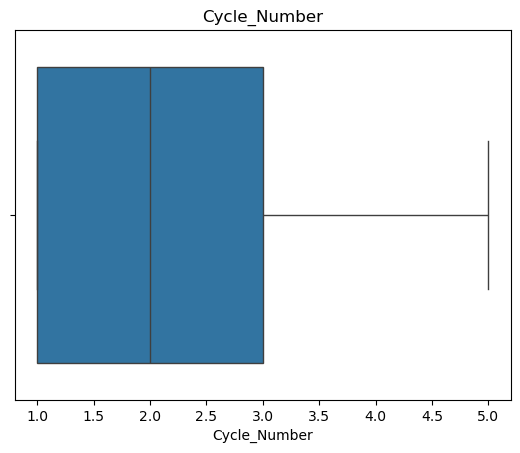

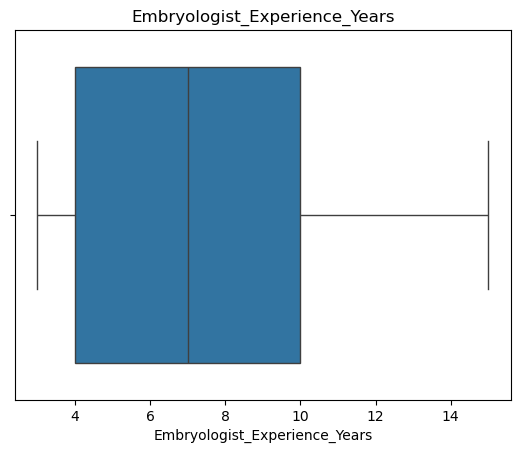

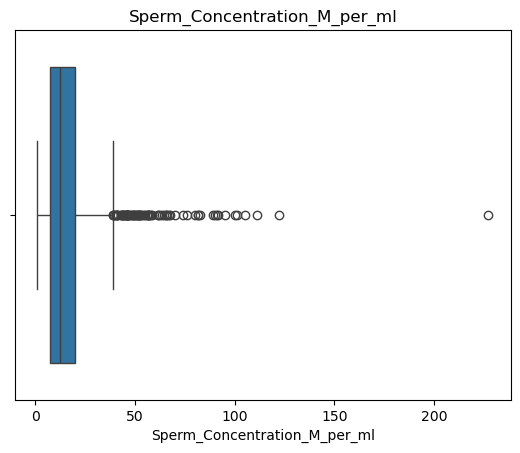

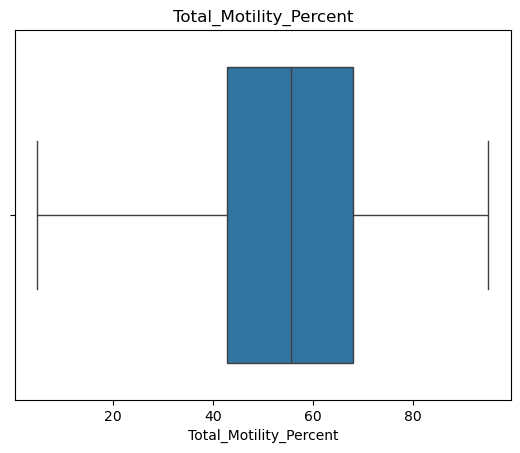

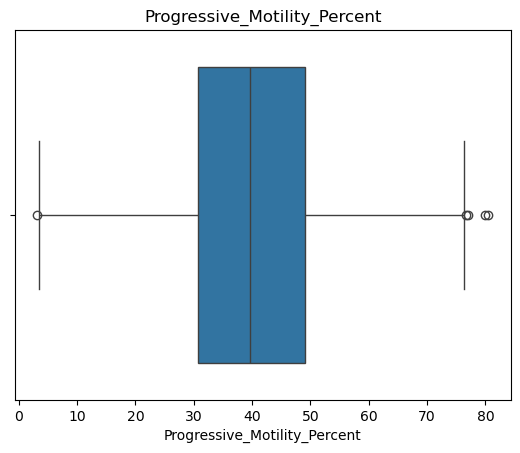

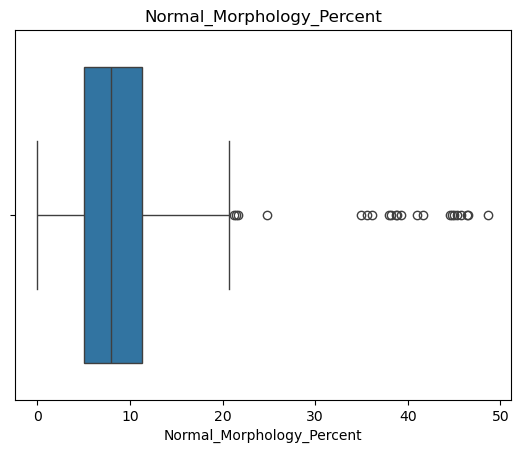

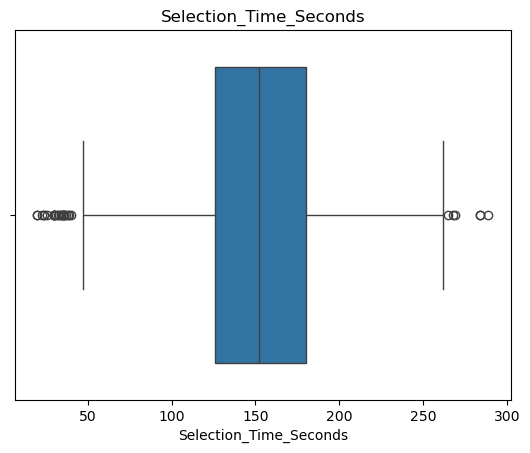

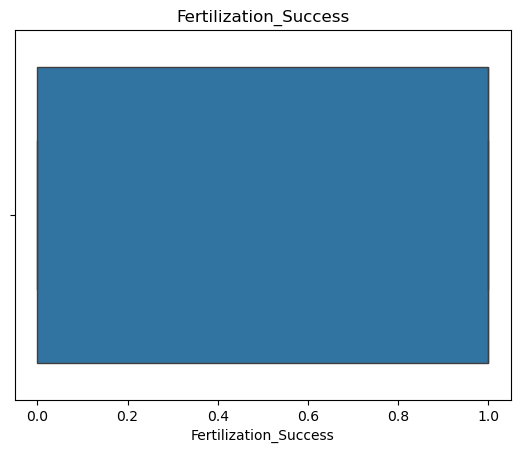

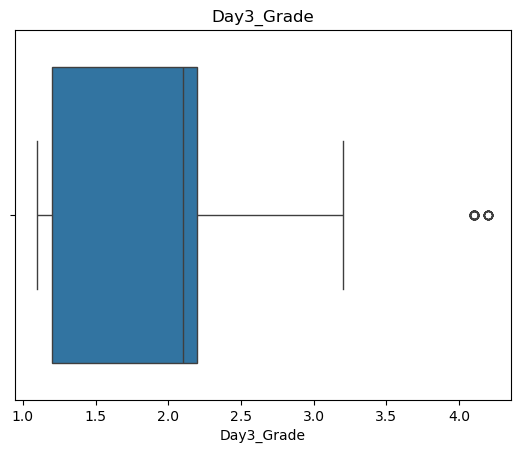

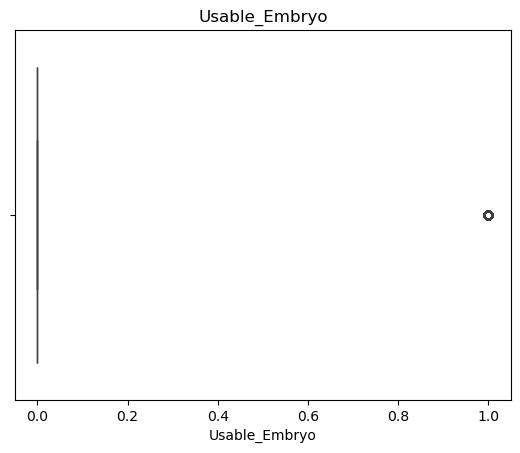

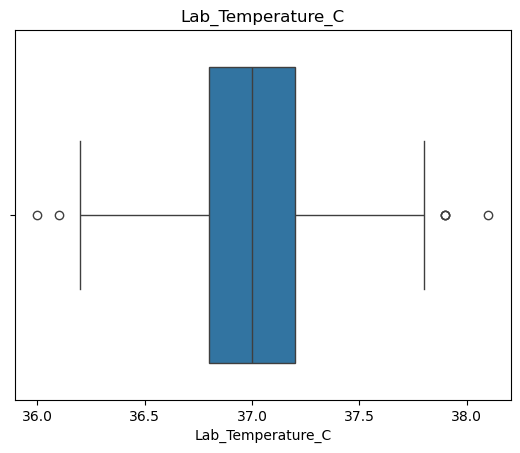

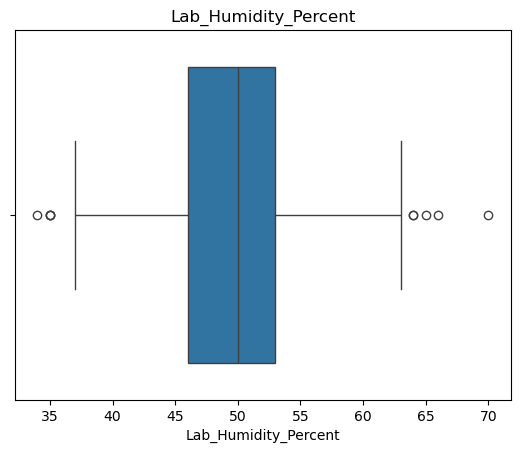

In [82]:
for cols in numeric_cols:
    sns.boxplot(x = data[cols])
    plt.title(cols)
    plt.show()

# Outlier Treatment

# 1. for "Sperm_Concentration_M_per_ml" column

In [84]:
IQR_1 = data['Sperm_Concentration_M_per_ml'].quantile(0.75) - data['Sperm_Concentration_M_per_ml'].quantile(0.25)
IQR_1

12.72

In [86]:
lower_limit = data['Sperm_Concentration_M_per_ml'].quantile(0.25) - (IQR_1 * 1.5)
upper_limit = data['Sperm_Concentration_M_per_ml'].quantile(0.75) + (IQR_1 * 1.5)

print(lower_limit)
print(upper_limit)

-11.855000000000002
39.025000000000006


# Replacing the outliers: Replace the outliers with maximum and minimum limit

In [88]:
data['Sperm_Concentration_M_per_ml_replaced'] = pd.DataFrame(np.where(data['Sperm_Concentration_M_per_ml'] > upper_limit, upper_limit, np.where(data['Sperm_Concentration_M_per_ml'] < lower_limit, lower_limit, data['Sperm_Concentration_M_per_ml'])))

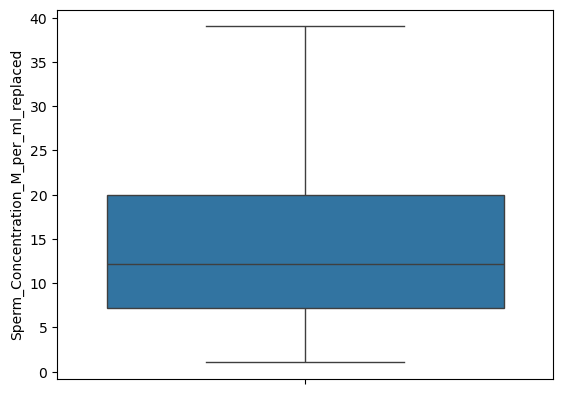

In [90]:
sns.boxplot(data['Sperm_Concentration_M_per_ml_replaced'])
plt.show()

# 2. For "Progressive_Motility_Percent" column

In [92]:
IQR_2 = data['Progressive_Motility_Percent'].quantile(0.75) - data['Progressive_Motility_Percent'].quantile(0.25)
IQR_2

18.3

In [94]:
lower_limit = data['Progressive_Motility_Percent'].quantile(0.25) - (IQR_2 * 1.5)
upper_limit = data['Progressive_Motility_Percent'].quantile(0.75) + (IQR_2 * 1.5)

print(lower_limit)
print(upper_limit)

3.2499999999999964
76.45


# Replacing the outliers: Replace the outliers with Maximun and minimum limit

In [96]:
data['Progressive_Motility_Percent_replaced'] = pd.DataFrame(np.where(data['Progressive_Motility_Percent'] > upper_limit, upper_limit, np.where(data['Progressive_Motility_Percent'] < lower_limit, lower_limit, data['Progressive_Motility_Percent'])))

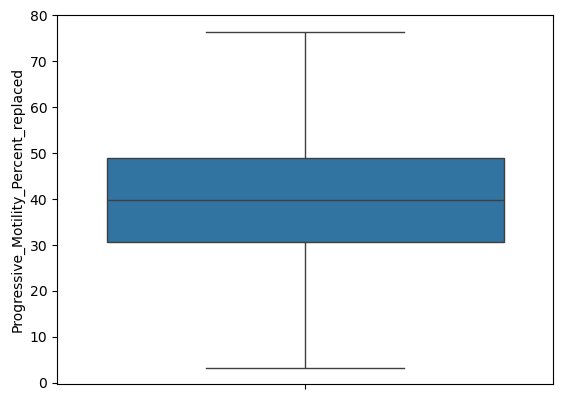

In [98]:
sns.boxplot(data['Progressive_Motility_Percent_replaced'])
plt.show()

# 3. For "Normal_Morphology_Percent" column

In [100]:
IQR_3 = data['Normal_Morphology_Percent'].quantile(0.75) - data['Normal_Morphology_Percent'].quantile(0.25)
IQR_3

6.300000000000001

In [102]:
lower_limit = data['Normal_Morphology_Percent'].quantile(0.25) - (IQR_3 * 1.5)
upper_limit = data['Normal_Morphology_Percent'].quantile(0.75) + (IQR_3 * 1.5)

print(lower_limit)
print(upper_limit)

-4.450000000000001
20.75


# Replace the outliers: Replacing the outliers with minimum and maximum limits

In [104]:
data['Normal_Morphology_Percent_replaced'] = pd.DataFrame(np.where(data['Normal_Morphology_Percent'] > upper_limit, upper_limit, np.where(data['Normal_Morphology_Percent'] < lower_limit, lower_limit, data['Normal_Morphology_Percent']))) 

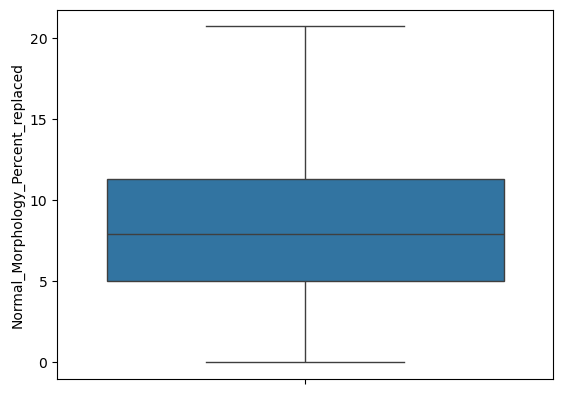

In [105]:
sns.boxplot(data['Normal_Morphology_Percent_replaced'])
plt.show()

# 4. For "Selection_Time_Seconds" columns

In [107]:
IQR_4 = data['Selection_Time_Seconds'].quantile(0.75) - data['Selection_Time_Seconds'].quantile(0.25)
IQR_4

54.5

In [108]:
lower_limit = data['Selection_Time_Seconds'].quantile(0.25) - (IQR_4 * 1.5)
upper_limit = data['Selection_Time_Seconds'].quantile(0.75) + (IQR_4 * 1.5)

print(lower_limit)
print(upper_limit)

44.25
262.25


# Replace the outliers: Replace the outliers with minimum and maximum limits

In [112]:
data['Selection_Time_Seconds_replaced'] = pd.DataFrame(np.where(data['Selection_Time_Seconds'] > upper_limit, upper_limit, np.where(data['Selection_Time_Seconds'] < lower_limit, lower_limit, data['Selection_Time_Seconds'])))

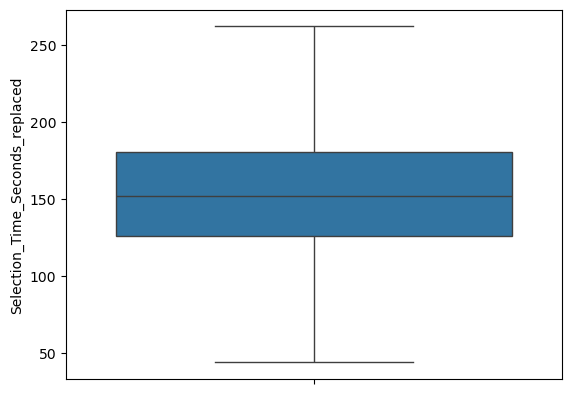

In [117]:
sns.boxplot(data['Selection_Time_Seconds_replaced'])
plt.show()

# 5. For "Lab_Temperature_C" column

In [120]:
IQR_5 = data['Lab_Temperature_C'].quantile(0.75) - data['Lab_Temperature_C'].quantile(0.25)
IQR_5

0.4000000000000057

In [122]:
lower_limit = data['Lab_Temperature_C'].quantile(0.25) - (IQR_5 * 1.5)
upper_limit = data['Lab_Temperature_C'].quantile(0.75) + (IQR_5 * 1.5)

print(lower_limit)
print(upper_limit)

36.19999999999999
37.80000000000001


# Replace the outliers: Replace the outliers with minimum and maximum limits

In [125]:
data['Lab_Temperature_C_replaced'] = pd.DataFrame(np.where(data['Lab_Temperature_C'] > upper_limit, upper_limit, np.where(data['Lab_Temperature_C'] < lower_limit, lower_limit, data['Lab_Temperature_C'])))

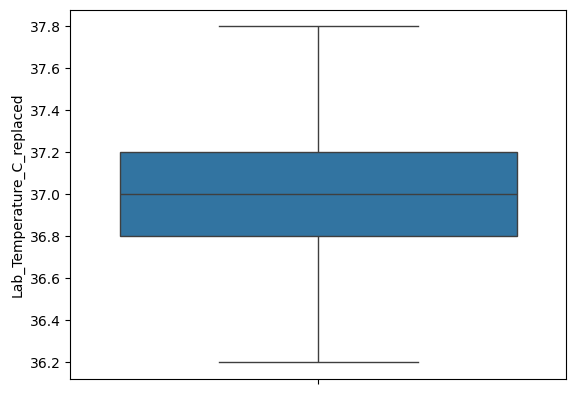

In [127]:
sns.boxplot(data['Lab_Temperature_C_replaced'])
plt.show()

# 6. For "Lab_Humidity_Percent" column

# Using Winsorization

In [131]:
pip install feature_engine

In [132]:
from feature_engine.outliers import Winsorizer

In [133]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables = ['Lab_Humidity_Percent'])

In [134]:
data_s = winsor_iqr.fit_transform(data[['Lab_Humidity_Percent']])

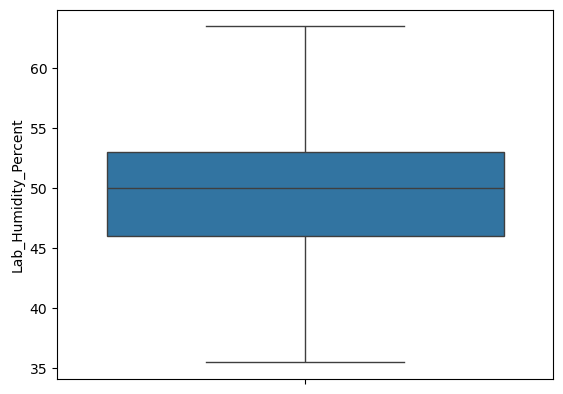

In [135]:
sns.boxplot(data_s.Lab_Humidity_Percent)
plt.show()

# Zero Variance & Near Zero variance

In [138]:
numeric_columns = data.select_dtypes(include = np.number)

In [139]:
numeric_columns

,Cycle_Number,Embryologist_Experience_Years,Sperm_Concentration_M_per_ml,Total_Motility_Percent,Progressive_Motility_Percent,Normal_Morphology_Percent,Selection_Time_Seconds,Fertilization_Success,Day3_Grade,Usable_Embryo,Lab_Temperature_C,Lab_Humidity_Percent,Sperm_Concentration_M_per_ml_replaced,Progressive_Motility_Percent_replaced,Normal_Morphology_Percent_replaced,Selection_Time_Seconds_replaced,Lab_Temperature_C_replaced
0,5,4,18.75,69.3,55.5,6.2,100,0,NaN,0,36.9,49,18.750,55.5,6.2,100.00,36.9
1,3,6,26.65,73.6,47.5,2.8,199,0,NaN,0,37.0,55,26.650,47.5,2.8,199.00,37.0
2,4,12,4.58,43.1,36.2,0.1,150,1,1.2,0,36.9,52,4.580,36.2,0.1,150.00,36.9
3,1,4,47.26,67.7,47.2,7.5,177,1,1.1,0,36.6,50,39.025,47.2,7.5,177.00,36.6
4,3,10,3.03,61.0,41.8,1.2,128,1,1.2,0,37.3,50,3.030,41.8,1.2,128.00,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,3,4,12.72,57.1,45.1,2.2,262,1,1.1,0,36.4,44,12.720,45.1,2.2,262.00,36.4
1211,1,10,26.50,53.0,44.6,0.0,30,0,NaN,0,36.9,45,26.500,44.6,0.0,44.25,36.9
1212,1,3,24.36,43.7,27.5,5.7,212,0,NaN,0,37.3,49,24.360,27.5,5.7,212.00,37.3
1213,1,15,6.58,49.1,33.3,8.2,147,0,NaN,0,37.6,57,6.580,33.3,8.2,147.00,37.6


In [140]:
numeric_columns.var()

Cycle_Number                                1.400774
Embryologist_Experience_Years              13.373593
Sperm_Concentration_M_per_ml              254.831735
Total_Motility_Percent                    313.790615
Progressive_Motility_Percent              184.045674
Normal_Morphology_Percent                  37.198416
Selection_Time_Seconds                   1887.777924
Fertilization_Success                       0.240686
Day3_Grade                                  0.691351
Usable_Embryo                               0.181863
Lab_Temperature_C                           0.092743
Lab_Humidity_Percent                       25.632873
Sperm_Concentration_M_per_ml_replaced     104.981058
Progressive_Motility_Percent_replaced     183.514753
Normal_Morphology_Percent_replaced         22.680379
Selection_Time_Seconds_replaced          1811.783275
Lab_Temperature_C_replaced                  0.091424
dtype: float64

In [141]:
numeric_columns.var() == 0

Cycle_Number                             False
Embryologist_Experience_Years            False
Sperm_Concentration_M_per_ml             False
Total_Motility_Percent                   False
Progressive_Motility_Percent             False
Normal_Morphology_Percent                False
Selection_Time_Seconds                   False
Fertilization_Success                    False
Day3_Grade                               False
Usable_Embryo                            False
Lab_Temperature_C                        False
Lab_Humidity_Percent                     False
Sperm_Concentration_M_per_ml_replaced    False
Progressive_Motility_Percent_replaced    False
Normal_Morphology_Percent_replaced       False
Selection_Time_Seconds_replaced          False
Lab_Temperature_C_replaced               False
dtype: bool

In [142]:
numeric_columns.var(axis=0) == 0

Cycle_Number                             False
Embryologist_Experience_Years            False
Sperm_Concentration_M_per_ml             False
Total_Motility_Percent                   False
Progressive_Motility_Percent             False
Normal_Morphology_Percent                False
Selection_Time_Seconds                   False
Fertilization_Success                    False
Day3_Grade                               False
Usable_Embryo                            False
Lab_Temperature_C                        False
Lab_Humidity_Percent                     False
Sperm_Concentration_M_per_ml_replaced    False
Progressive_Motility_Percent_replaced    False
Normal_Morphology_Percent_replaced       False
Selection_Time_Seconds_replaced          False
Lab_Temperature_C_replaced               False
dtype: bool